Importing libraries and examining at our dataset

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

import itertools
from itertools import combinations

In [2]:
df = pd.read_csv('C:/Users/gudin/Desktop/Project files/ML_gym_churn_project/gym_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [5]:
df.duplicated().sum()

0

As we can there are no lost data and are no duplicates.

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
df.groupby(['Churn']).mean().round(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


When we look at our churn groups, we can see that mean values of those who left are lower than of those clients who stayed.

Gender, location, age, client working at the gym have the lease margin between mean values.

However contract period, month to end, lifeime have the highest mean margin.

Lets build histogramms and Correlation Matrix of two churn groups

In [8]:
churn_0 = df[df['Churn']==0]
churn_1 = df[df['Churn']==1]

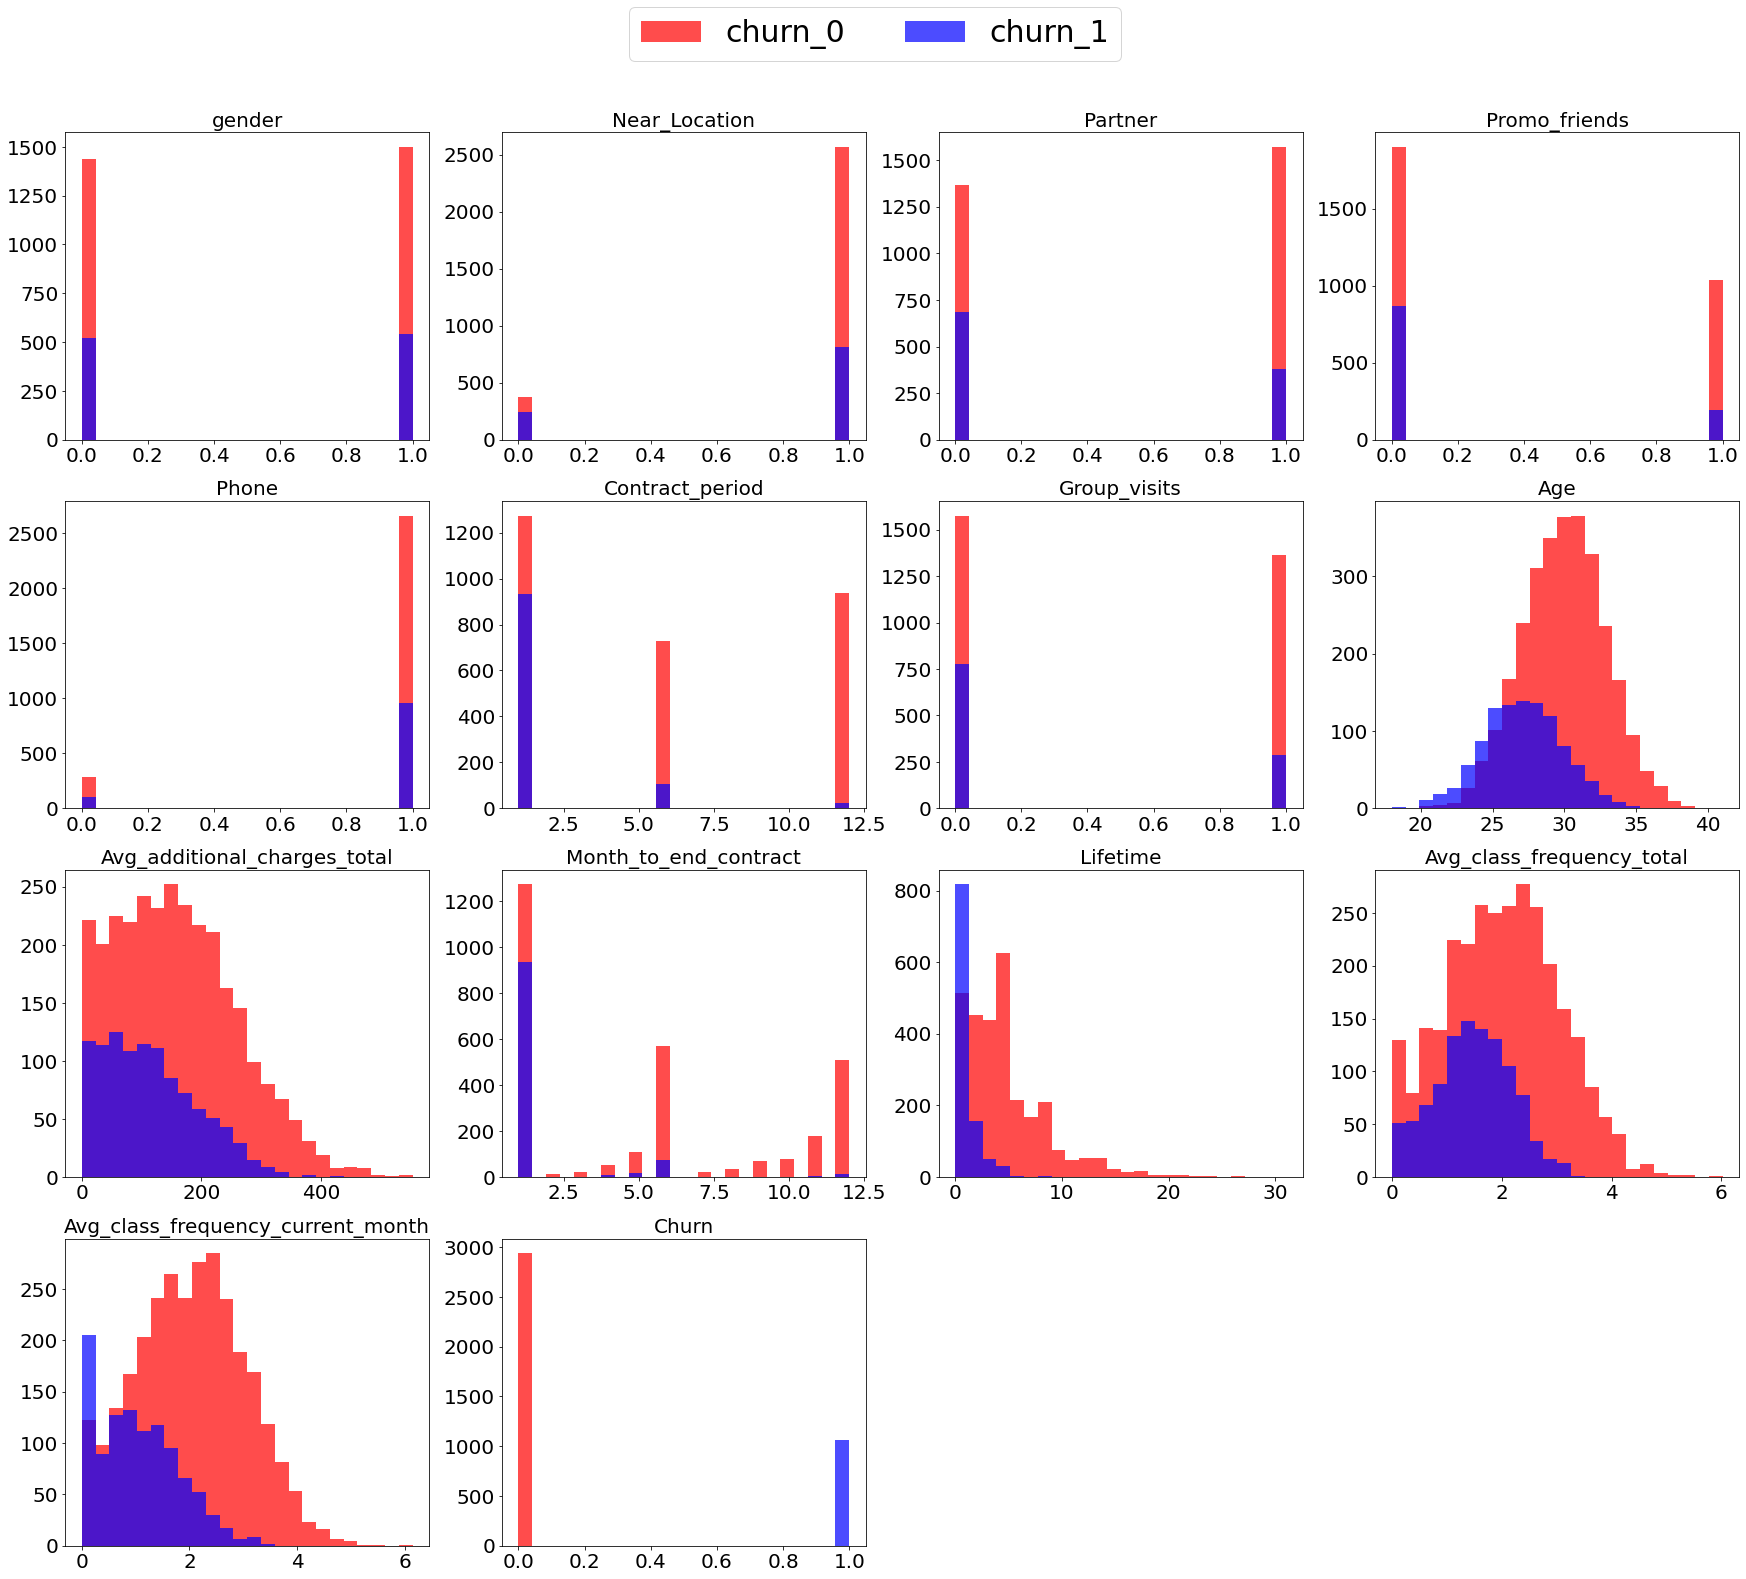

In [9]:
plot_columns = 4

n_bins = 25

fig, ax = plt.subplots(4, 4, figsize=(30, 26))

ax = ax.flatten()

labels=['churn_0', 'churn_1']

for i in range(len(df.columns)):
    
    col = df.columns[i]
    
    bins = np.linspace(df[col].min(), df[col].max(), n_bins)
    
    ax[i].hist(churn_0[col], bins, alpha=.7, color='red')
    ax[i].hist(churn_1[col], bins, alpha=.7, color='blue')
    ax[i].set_title(df.columns[i], fontsize=20)
    ax[i].tick_params(axis='both', labelsize=20)


fig.delaxes(ax[14])
fig.delaxes(ax[15])

fig.legend(labels, loc=9, prop={'size': 30}, ncol=2, bbox_to_anchor=[0.5, 0.955])

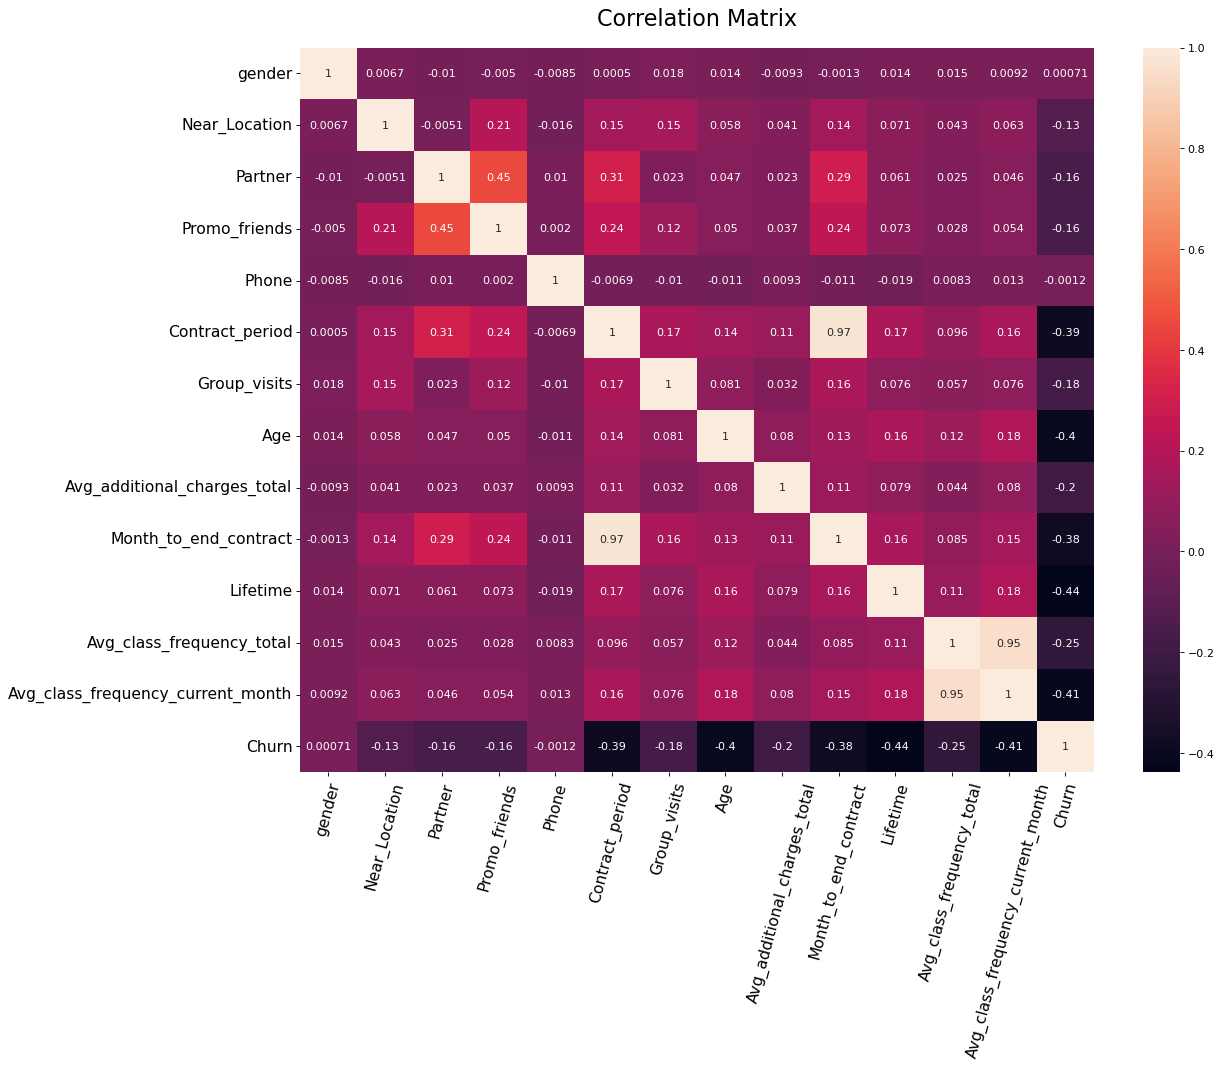

In [10]:
plt.figure(figsize=(16, 12), dpi= 80)
sb.heatmap(df.corr(), annot=True)

plt.xticks(fontsize=14, rotation=75)
plt.yticks(fontsize=14)

plt.title('Correlation Matrix', fontsize=20, pad=20)

plt.show()

Correlation between the fact that client works at the gym and promo "bring a friend" is of particular interest here.

However most features have little correlation with "Churn".

Lets teach our machine on logic regression and random forest, compare metrics and then do clasterization of out clients

In [11]:
def print_all_metrics(y_true, y_pred, y_proba, title='Classificaition metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)

In [17]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

In [20]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [21]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [22]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Logic regression metrics:',
)

Logic regression metrics:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [23]:
print_all_metrics(
    y_test, 
    rf_predictions, 
    rf_probabilities, 
    title='Random forest metrics:'
)

Random forest metrics:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


As we can see Logic regression did better compared to Random Forest regression. Its Preision and Accuracy scores are higher.

At the same time all metrics are high, but not too high, which indicates that our system did not overlearn itself.

In [24]:
X_sc = scaler.fit_transform(X)

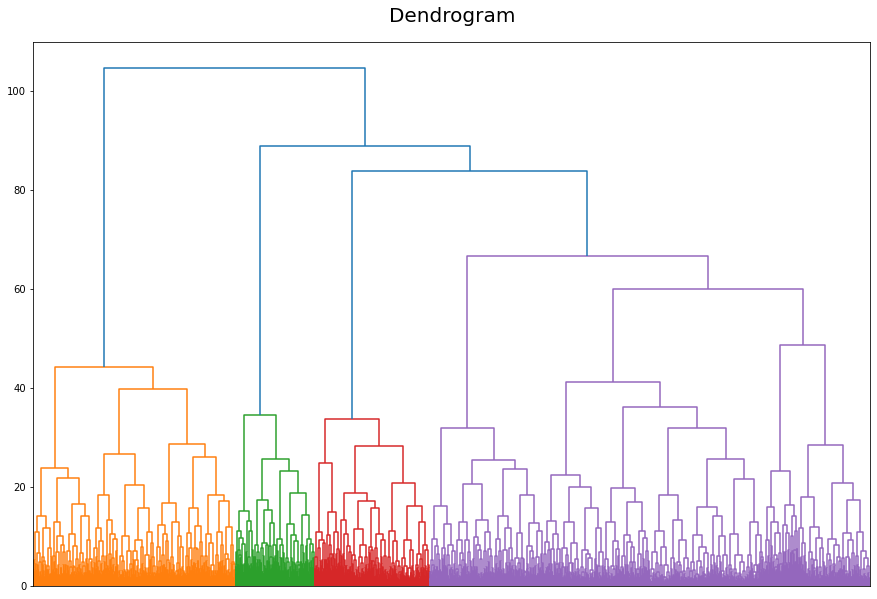

In [25]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Dendrogram', fontsize=20, pad=20)

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

Dendrogram shows us that we have 4 clusters total, lets use K-means method to look at those clusters

In [26]:
km = KMeans(n_clusters=4, random_state=0)

labels = km.fit_predict(X_sc)

df['cluster_km'] = labels

display(df.groupby(by=['cluster_km']).mean().round(3))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523,0.863,0.472,0.306,0.0,4.777,0.427,29.298,144.208,4.466,3.940,1.854,1.724,0.267
1,0.487,0.759,0.381,0.191,1.0,1.899,0.293,28.048,129.705,1.805,2.235,1.205,0.952,0.560
2,0.545,0.862,0.343,0.205,1.0,2.403,0.447,29.990,157.359,2.239,4.705,2.725,2.711,0.093
3,0.504,0.941,0.777,0.572,1.0,10.698,0.536,29.913,161.363,9.768,4.730,1.984,1.976,0.030


Lets visualize them via bunch of histogramms

In [27]:
clusters = df.groupby(by=['cluster_km'])

clust_columns = 4

clust_rows = len(df.columns)

clust_bins = 20

fig, ax = plt.subplots(clust_rows, clust_columns, sharey='row', figsize=(150, 500))

for i in range(len(df.columns)):
    for j in range(df['cluster_km'].nunique()):
    
        col = df.columns[i]
    
        bins = np.linspace(df[col].min(), df[col].max(), clust_bins)
    
        ax[i][j].hist(df[df['cluster_km']==j][col], clust_bins, alpha=.7)
        ax[i][j].set_title(df.columns[i] + ' cluster_' + str(j+1), fontsize=100)
        ax[i][j].tick_params(axis='both', labelsize=100)
        
plt.show()        

2nd cluster looks like the most important among other 3 as it has the most values in all features

In [28]:
df.groupby(by=['cluster_km'])['Churn'].mean().round(3)

cluster_km
0    0.267
1    0.560
2    0.093
3    0.030
Name: Churn, dtype: float64

And we can clearly see that it has the most "range" among others - 0.560

All this leads us to looking further into 2nd clusterized client group and using that information to understand how we can lower churn rate of that particular group and with what methods.